# Simulation of Other Methods

## 1. Graph System Identification (GSI) from paper [Graph Learning From Filtered Signals: Graph System and Diffusion Kernel Identification](https://arxiv.org/pdf/1803.02553.pdf)

In [40]:
import numpy as np
import pandas as pd
import networkx as nx
import torch
import scipy.io

import os
import sys
sys.path.append('/Users/apple/Desktop/graph_learning/FilterLearning/src')

from matplotlib import pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import f1_score

import generators as gen
import optimize as opt
import helpers as hel
import pickle as pkl
from NNet import NNet
from networkx.generators.community import stochastic_block_model


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# generate data
def generate_sbm(nnodes=10, p_in=.8, p_out=.1, seed=42, n_blocks=2):
    """generates stochastic block model with 2 clusters, with nnodes."""
    if n_blocks==2:
        G = stochastic_block_model([nnodes//2,nnodes//2],[[p_in,p_out],[p_out,p_in]], seed=seed)
        A = nx.adjacency_matrix(G).todense()
        L = nx.laplacian_matrix(G).todense()

        
    else:
        prob_matrix = np.eye(n_blocks)*(p_in-p_out) + p_out
        G = stochastic_block_model([nnodes//n_blocks]*n_blocks, prob_matrix, seed=seed)  
        A = nx.adjacency_matrix(G).todense()          
        L = nx.laplacian_matrix(G).todense()
    return G, A, L

def create_multiple_graphs_G(n_graphs=20, **kwargs):
    return [generate_sbm(seed=i, **kwargs) for i in range(n_graphs)]

def to_pickle(obj, filename):
    with open(filename, 'wb') as f:
        pkl.dump(obj, f)
        
def from_pickle(filename):
    with open(filename, 'rb') as f:
        return pkl.load(f)

In [23]:
res_30 = create_multiple_graphs_G(20, nnodes=45, p_in=.3, p_out=.1, n_blocks=3)
Gs_30_diffkernel = [i[0] for i in res_30]
As_30_diffkernel = [i[1] for i in res_30]
Ls_30_diffkernel = [i[2] for i in res_30]
to_pickle(Ls_30_diffkernel, 'res/imp/diff_ker/Ls_30_diffkernel.pkl')
to_pickle(As_30_diffkernel, 'res/imp/diff_ker/As_30_diffkernel.pkl')
to_pickle(Gs_30_diffkernel, 'res/imp/diff_ker/Gs_30_diffkernel.pkl')

scipy.io.savemat('res/imp/diff_ker//mat_files/As_30_diffkernel.mat', mdict={'As_diffkernel': As_30_diffkernel})

res_50 = create_multiple_graphs_G(20, nnodes=45, p_in=.5, p_out=.1, n_blocks=3)
Gs_50_diffkernel = [i[0] for i in res_50]
As_50_diffkernel = [i[1]  for i in res_50]
Ls_50_diffkernel = [i[2] for i in res_50]
to_pickle(Ls_50_diffkernel, 'res/imp/diff_ker/Ls_50_diffkernel.pkl')
to_pickle(As_50_diffkernel, 'res/imp/diff_ker/As_50_diffkernel.pkl')
to_pickle(Gs_50_diffkernel, 'res/imp/diff_ker/Gs_50_diffkernel.pkl')

scipy.io.savemat('res/imp/diff_ker//mat_files/As_50_diffkernel.mat', mdict={'As_diffkernel': As_50_diffkernel})


res_70 = create_multiple_graphs_G(20, nnodes=45, p_in=.7, p_out=.1, n_blocks=3)
Gs_70_diffkernel = [i[0] for i in res_70]
As_70_diffkernel = [i[1] for i in res_70]
Ls_70_diffkernel = [i[2] for i in res_70]
to_pickle(Ls_70_diffkernel, 'res/imp/diff_ker/Ls_70_diffkernel.pkl')
to_pickle(As_70_diffkernel, 'res/imp/diff_ker/As_70_diffkernel.pkl')
to_pickle(Gs_70_diffkernel, 'res/imp/diff_ker/Gs_70_diffkernel.pkl')

scipy.io.savemat('res/imp/diff_ker//mat_files/As_70_diffkernel.mat', mdict={'As_diffkernel': As_70_diffkernel})

Use saved gaphs and run the algorithm in provided matlab codes. Then, load the results here:

In [41]:
As_truth_dict= scipy.io.loadmat('res/imp/diff_ker//mat_files/As_diffkernel_true.mat')
As_truth = As_truth_dict['As_diffkernel_true']

(20, 45, 45)

In [42]:
As_res_dict = scipy.io.loadmat('res/imp/diff_ker//mat_files/As_diffkernel_res.mat')
As_res = As_res_dict['As_diffkernel_res']

(20, 45, 45)

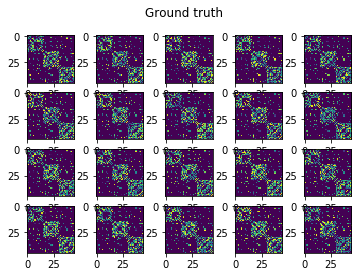

In [104]:
fig, axs = plt.subplots(4,5)
fig.suptitle('Ground Truth Adjacency Graphs')
k = 0
for i in range(4):
    for j in range(5):
        axs[i, j].imshow(As_truth[k,:,:])
        k+=1

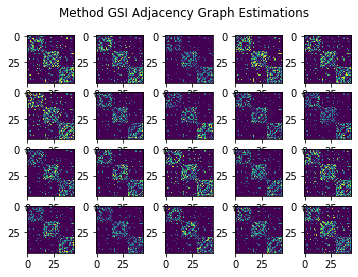

In [106]:
fig, axs = plt.subplots(4,5)
fig.suptitle('Method GSI Adjacency Graph Estimations')
k = 0
for i in range(4):
    for j in range(5):
        axs[i, j].imshow(As_res[k,:,:])
        k+=1

## Plot our results to compare

In [ ]:
# from os import walk

# f = []
# for (dirpath, dirnames, filenames) in walk(mypath):
#     f.extend(filenames)
#     break
